# Import Libraries

In [392]:
import numpy as np    #import numpy to algebric 
import pandas as pd   #import pandas to deal with data frames
from sklearn.linear_model import LinearRegression  #import Linear regression class from sklearn
from sklearn.model_selection import train_test_split #import train test class to split data to train and test
from sklearn import metrics    #import metrics class to use MSE 
from sklearn.preprocessing import Normalizer  #import normalizer class to scale data

# Take look on data and analysis

In [393]:
#import data frame from path
data = pd.read_csv('autos.csv')

In [394]:
#getting first 5 rows from data
data.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [395]:
#get some information about data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,371528.0,185763.500000,1.072510e+05,0.0,92881.75,185763.5,278645.25,3.715270e+05
price,371528.0,17295.141865,3.587954e+06,0.0,1150.00,2950.0,7200.00,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.00,2003.0,2008.00,9.999000e+03
powerPS,371528.0,115.549477,1.921396e+02,0.0,70.00,105.0,150.00,2.000000e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.00,150000.0,150000.00,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.00,6.0,9.00,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.00,0.0,0.00,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.00,49610.0,71546.00,9.999800e+04


In [396]:
#get info about null data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

# Cleaning Data

In [397]:
#drop null rows from data
data = data.dropna(subset = ['model' , 'gearbox' , 'powerPS' , 'yearOfRegistration' , 'kilometer' , 'fuelType' , 'price' , 'notRepairedDamage' ])

In [398]:
#cleaning outliers in year feature
data = data[data['yearOfRegistration'] > 1900 ]
data = data[data['yearOfRegistration'] < 2016 ]

In [399]:
#cleaning outliers in price feature
data = data[data['price'] > 1.5e+03 ]
data = data[data['price'] < 1.0e+06 ]

In [400]:
#adding new column that calculate age of car 
data['age'] = 2016 - data['yearOfRegistration']

In [401]:
data.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,age
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,8
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,12
10,10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,...,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34,12
11,11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,...,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17,11
14,14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,privat,Angebot,17999,control,suv,2011,manuell,...,70000,3,diesel,nissan,nein,2016-03-21 00:00:00,0,4177,2016-04-06 07:45:42,5


In [402]:
#getting important feature that will be used in study
data = data[['price' , 'gearbox' , 'kilometer' , 'fuelType' , 'notRepairedDamage' , 'age' , 'brand'] ]

In [403]:
data.head()

,price,gearbox,kilometer,fuelType,notRepairedDamage,age,brand
4,3600,manuell,90000,diesel,nein,8,skoda
6,2200,manuell,150000,benzin,nein,12,peugeot
10,2000,manuell,150000,benzin,nein,12,mazda
11,2799,manuell,150000,diesel,ja,11,volkswagen
14,17999,manuell,70000,diesel,nein,5,nissan


In [404]:
#encoding some string features
data = pd.get_dummies(data)

In [405]:
data

,price,kilometer,age,gearbox_automatik,gearbox_manuell,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,...,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
4,3600,90000,8,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6,2200,150000,12,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2000,150000,12,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2799,150000,11,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14,17999,70000,5,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371517,7900,150000,6,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
371518,3999,150000,11,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
371520,3200,150000,12,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
371525,9200,150000,20,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [406]:
#scaling data by normalizing all features and target
data = Normalizer().fit_transform(data)

In [407]:
#select features columns to train model
x = data[0 : , 1 :]

In [408]:
#select target column
y = data[0 : , 0]

# Use Linear Regression Model

In [409]:
#split data to train and test data
#use 15% from data to test the model
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 100)

In [410]:
#fit the x train with y train
lin_reg = LinearRegression().fit(x_train , y_train)

In [411]:
#test the model with x test
y_predict = lin_reg.predict(x_test)

In [412]:
#calculating MSE between y test and y predict
MSE_error = metrics.mean_squared_error(y_test , y_predict)

In [413]:
print("mean square error : " ,MSE_error)

mean square error :  0.003908562152960405


the error is very small about .39%

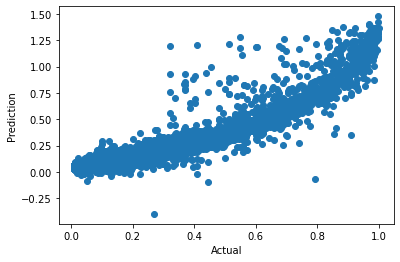

In [414]:
#plotting relation between y test and y predict
plt.scatter(y_test , y_predict)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

We will notice that the relation is linear and the model is almost good to predict true results